In [102]:
%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

In [127]:
data = pd.read_csv('https://raw.githubusercontent.com/Viroslav/SFE/master/DS/dengue_features_train.csv', index_col=[0,1,2]) 
labels = pd.read_csv('https://raw.githubusercontent.com/Viroslav/SFE/master/DS/dengue_labels_train.csv', index_col=[0,1,2])
data = data.join(labels)

In [128]:
data.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22                   3.014286           28.942857   

                      station_diur_temp_rng_c  station_max_temp_c  \
city year weekofyear                                                
sj   1990 18                         6.900000                29.4   
          19                         6.371429                31.7   
          20                         6.485714                32.2   
       

In [129]:
data.dtypes

week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm   

In [130]:
data['week_start_date'] =pd.to_datetime(data['week_start_date'])

In [131]:
data = data.reset_index()
data.fillna(0, inplace=True)

In [133]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [134]:
data.drop(columns=['weekofyear', 'year'], inplace = True, axis = 0)

In [135]:
data_sj = data.query('city == "sj"')
data_iq = data.query('city == "iq"')

In [136]:
data_sj.head()

,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [139]:
steps=-1
data_sj_for_prediction = data_sj.copy()
data_sj_for_prediction['next_week_actual']= data_sj_for_prediction['total_cases'].shift(steps)
data_sj_for_prediction.tail(3)

,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,next_week_actual
933,sj,2008-04-08,-0.1552,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,...,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,3.0
934,sj,2008-04-15,0.0018,0.000000,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,...,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,5.0
935,sj,2008-04-22,-0.0370,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,...,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5,NaN


In [140]:

data_sj_for_prediction=data_sj_for_prediction.dropna()

In [141]:
data_sj_for_prediction.drop(columns=['city'], inplace = True)

Text(0.5, 1.0, 'Total_cases_in_sj')

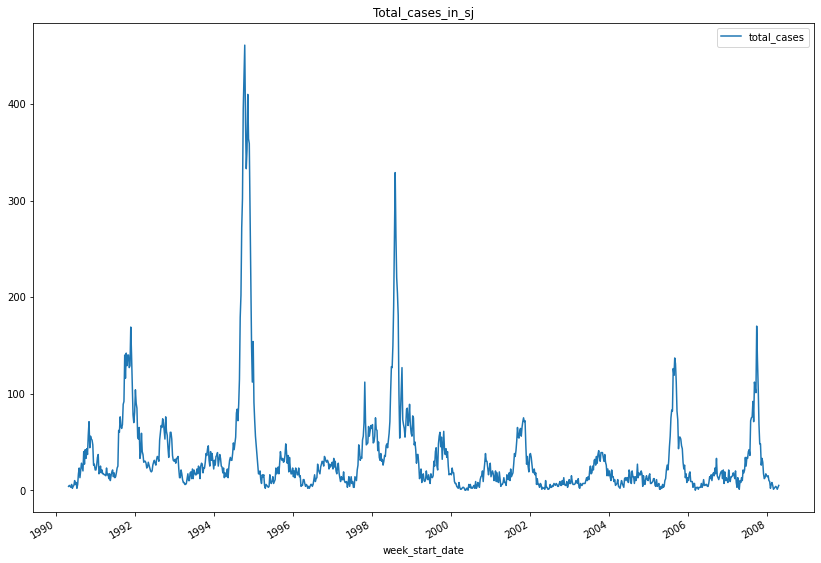

In [142]:
data_sj.plot(x ='week_start_date', y = 'total_cases', figsize = (14, 10))
plt.title("Total_cases_in_sj")

In [148]:
from pandas.tseries.offsets import BDay
data_sj_for_prediction['week_start_date'] =pd.to_datetime(data_sj_for_prediction['week_start_date'])
data_sj_for_prediction.index= data_sj_for_prediction['week_start_date']
data_sj_for_prediction = data_sj_for_prediction.drop(['week_start_date'], axis = 1)

In [149]:
data_sj_for_prediction.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,next_week_actual
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,5.0
1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,4.0
1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,3.0
1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,6.0
1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,2.0


In [150]:
data_sj_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 935 entries, 1990-04-30 to 2008-04-15
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ndvi_ne                                935 non-null    float64
 1   ndvi_nw                                935 non-null    float64
 2   ndvi_se                                935 non-null    float64
 3   ndvi_sw                                935 non-null    float64
 4   precipitation_amt_mm                   935 non-null    float64
 5   reanalysis_air_temp_k                  935 non-null    float64
 6   reanalysis_avg_temp_k                  935 non-null    float64
 7   reanalysis_dew_point_temp_k            935 non-null    float64
 8   reanalysis_max_air_temp_k              935 non-null    float64
 9   reanalysis_min_air_temp_k              935 non-null    float64
 10  reanalysis_precip_amt_kg_per_m2        935 non-null    

In [158]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input_sj = sc_in.fit_transform(data_sj_for_prediction.drop(columns = ['next_week_actual']))
scaled_input_sj =pd.DataFrame(scaled_input_sj)
X_sj=scaled_input_sj

In [159]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output_sj = sc_out.fit_transform(data_sj_for_prediction[['next_week_actual']])
scaler_output_sj =pd.DataFrame(scaler_output_sj)
y_sj=scaler_output_sj

In [160]:
X_sj

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.587840,0.626763,0.523701,0.541889,0.031797,0.984688,0.985367,0.981929,0.985212,0.986662,...,0.837740,0.031797,0.720826,0.593548,0.846081,0.695965,0.825843,0.781250,0.052305,0.008677
1,0.640416,0.669811,0.435300,0.492142,0.058423,0.986802,0.987684,0.987091,0.988827,0.988329,...,0.883448,0.058423,0.790785,0.535484,0.888361,0.642651,0.890449,0.867188,0.028114,0.010846
2,0.487412,0.704284,0.422680,0.526662,0.088428,0.988688,0.989126,0.992070,0.987512,0.991330,...,0.936936,0.088428,0.866696,0.519355,0.888361,0.654179,0.904494,0.890625,0.135338,0.008677
3,0.594546,0.785005,0.594845,0.672866,0.039324,0.989368,0.990284,0.991653,0.990470,0.990330,...,0.917345,0.039324,0.857657,0.548387,0.913539,0.682997,0.935393,0.910156,0.013076,0.006508
4,0.669649,0.804187,0.652699,0.698613,0.019252,0.991127,0.991726,0.993370,0.992113,0.991997,...,0.918748,0.019252,0.885288,0.680645,0.962470,0.945245,0.983146,0.933594,0.018960,0.013015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.501473,0.538009,0.286696,0.340447,0.000000,0.984131,0.984351,0.981229,0.985212,0.983328,...,0.832602,0.000000,0.706643,0.874194,0.838005,0.710375,0.842697,0.804688,0.001635,0.006508
931,0.538098,0.465965,0.797737,0.808538,0.069611,0.982656,0.982767,0.980859,0.984883,0.981661,...,0.847805,0.069611,0.701867,0.651613,0.832779,0.583573,0.842697,0.824219,0.005884,0.008677
932,0.409326,0.491790,0.330113,0.291862,0.009780,0.986371,0.986975,0.984687,0.985212,0.988663,...,0.851834,0.009780,0.754262,0.612903,0.872684,0.687320,0.859551,0.867188,0.001635,0.006508
933,0.279053,0.451579,0.375103,0.460063,0.043420,0.984315,0.984776,0.982999,0.983897,0.986329,...,0.856712,0.043420,0.729644,0.493548,0.831354,0.576369,0.825843,0.847656,0.100360,0.002169


In [156]:
data_sj_for_prediction.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'next_week_actual'],
      dtype='object')

In [161]:
X_sj.rename(columns={0:'ndvi_ne', 1:'ndvi_nw', 2:'ndvi_se', 3:'ndvi_sw', 4:'precipitation_amt_mm', \
                     5:'reanalysis_air_temp_k', 6:'reanalysis_avg_temp_k', \
                    7:'reanalysis_dew_point_temp_k', 8:'reanalysis_max_air_temp_k', \
                    9:'reanalysis_min_air_temp_k', 10:'reanalysis_precip_amt_kg_per_m2', \
                    11:'reanalysis_relative_humidity_percent', 12: 'reanalysis_sat_precip_amt_mm', \
                    13:'reanalysis_specific_humidity_g_per_kg', 14:'reanalysis_tdtr_k', \
                    15:'station_avg_temp_c', 16:'station_diur_temp_rng_c', 17:'station_max_temp_c', \
                    18:'station_min_temp_c', 19:'station_precip_mm', 20:'total_cases'}, inplace=True)

In [167]:
X_sj= pd.DataFrame(X_sj)
X_sj.index=data_sj_for_prediction.index
X_sj.head(4)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,0.587840,0.626763,0.523701,0.541889,0.031797,0.984688,0.985367,0.981929,0.985212,0.986662,...,0.837740,0.031797,0.720826,0.593548,0.846081,0.695965,0.825843,0.781250,0.052305,0.008677
1990-05-07,0.640416,0.669811,0.435300,0.492142,0.058423,0.986802,0.987684,0.987091,0.988827,0.988329,...,0.883448,0.058423,0.790785,0.535484,0.888361,0.642651,0.890449,0.867188,0.028114,0.010846
1990-05-14,0.487412,0.704284,0.422680,0.526662,0.088428,0.988688,0.989126,0.992070,0.987512,0.991330,...,0.936936,0.088428,0.866696,0.519355,0.888361,0.654179,0.904494,0.890625,0.135338,0.008677
1990-05-21,0.594546,0.785005,0.594845,0.672866,0.039324,0.989368,0.990284,0.991653,0.990470,0.990330,...,0.917345,0.039324,0.857657,0.548387,0.913539,0.682997,0.935393,0.910156,0.013076,0.006508


In [166]:
y_sj.rename(columns={0:'next_week_total_cases'}, inplace= True)
y_sj.index=data_sj_for_prediction.index
y_sj.head(5)

,next_week_total_cases
week_start_date,
1990-04-30,0.010846
1990-05-07,0.008677
1990-05-14,0.006508
1990-05-21,0.013015
1990-05-28,0.004338


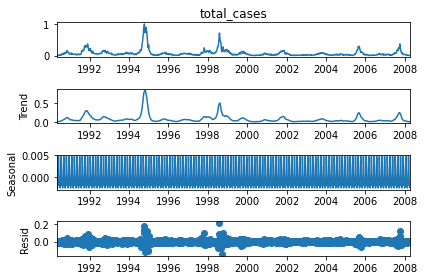

In [177]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X_sj['total_cases'],model='add', period = 7);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [178]:
train_size=int(len(X_sj) *0.80)
test_size = int(len(X_sj)) - train_size
print(test_size)

187


In [187]:
X_train, y_train = X_sj[:train_size].dropna(), y_sj[:train_size].dropna()
X_test, y_test = X_sj[train_size:].dropna(), y_sj[train_size:].dropna()

In [188]:
X_train.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

## **Augmented Dickey-Fuller(ADF)**

In [189]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [190]:
test_adf(y_train, "total_cases")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary total_cases


In [191]:
test_adf(y_test, "total_cases")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for total_cases


As it not stationary use differing to make it stationary

In [192]:
test_adf(y_test.diff(), "total_cases")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary total_cases


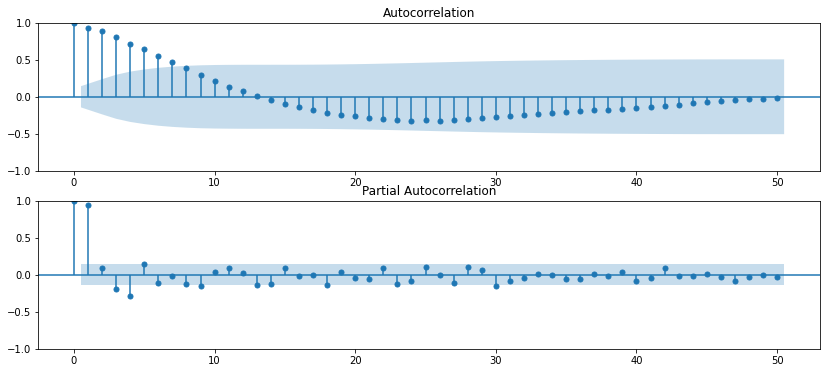

In [193]:
fig,ax= plt.subplots(2,1, figsize=(14,6))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [194]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train, 
                     exogenous= X_train,
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3088.034, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3081.993, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3084.850, Time=1.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3086.828, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3083.993, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3084.466, Time=2.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3080.227, Time=2.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3081.378, Time=2.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3082.327, Time=1.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3081.227, Time=2.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3090.062, Time=1.89 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3090.014, Time=1.82 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3086.891, Time=1.65 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3086.488, Time=2.02 sec
 ARIMA(1,1,2)(0,0,0

In [195]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  748
Model:               SARIMAX(1, 1, 1)   Log Likelihood                1569.031
Date:                Wed, 26 Oct 2022   AIC                          -3090.062
Time:                        11:42:33   BIC                          -2979.276
Sample:                             0   HQIC                         -3047.366
                                - 748                                         
Covariance Type:                  opg                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
ndvi_ne                                   0.0062      0.015      0.406      0.685      -0.024       0.036
ndvi_nw                                   0.0052      0.017      0.310      0.757      -0.027       0.038
ndvi_se                                  -0.0167      0.015     -1.138      0.255      -0.045       0.012
ndvi_sw                                   0.0230      0.016      1.469      0.142      -0.008       0.054
precipitation_amt_mm                      0.0047      0.006      0.790      0.429      -0.007       0.016
reanalysis_air_temp_k                   -22.1156     15.582     -1.419      0.156     -52.656       8.425
reanalysis_avg_temp_k                     0.2801      3.975      0.070      0.944      -7.510       8.070
reanalysis_dew_point_temp_k              22.4810     15.509      1.450      0.147      -7.916      52.878
reanalysis_max_air_temp_k                 0.4695      0.826      0.569      0.570      -1.149       2.088
reanalysis_min_air_temp_k                 0.1793      1.059      0.169      0.866      -1.897       2.255
reanalysis_precip_amt_kg_per_m2           0.0209      0.024      0.873      0.383      -0.026       0.068
reanalysis_relative_humidity_percent     -1.3995      0.894     -1.566      0.117      -3.151       0.352
reanalysis_sat_precip_amt_mm              0.0047      0.006      0.790      0.429      -0.007       0.016
reanalysis_specific_humidity_g_per_kg    -0.0533      0.111     -0.480      0.631      -0.271       0.164
reanalysis_tdtr_k                         0.0012      0.019      0.063      0.950      -0.036       0.038
station_avg_temp_c                       -0.0779      0.152     -0.513      0.608      -0.375       0.220
station_diur_temp_rng_c                   0.0008      0.023      0.036      0.971      -0.043       0.045
station_max_temp_c                       -0.0250      0.062     -0.402      0.688      -0.147       0.097
station_min_temp_c                        0.0797      0.049      1.629      0.103      -0.016       0.176
station_precip_mm                         0.0191      0.012      1.537      0.124      -0.005       0.043
total_cases                               0.2676      0.023     11.724      0.000       0.223       0.312
ar.L1                                    -0.8236      0.064    -12.815      0.000      -0.950      -0.698
ma.L1                                     0.7438      0.086      8.650      0.000       0.575       0.912
sigma2                                    0.0009   2.12e-05     41.273      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3463.73
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -0.51
Prob(H) (two-sided):                  0.00 

In [196]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(y_train, 
           exog=X_train,
              order=(0,1,2),
              enforce_invertibility=False, enforce_stationarity=False)

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [197]:
results= model.fit()

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [199]:
results = model.fit()
predictions= results.predict(start =train_size, end=train_size+test_size+(steps),exog=X_test)
print(len(predictions))

187


C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [201]:
forecast_1= results.forecast(steps=test_size, exog=X_test)

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [203]:
act= pd.DataFrame(scaler_output_sj.iloc[train_size:, 0])

In [204]:
forecast_total_cases_next_week= pd.DataFrame(forecast_1)
forecast_total_cases_next_week.reset_index(drop=True, inplace=True)
forecast_total_cases_next_week.index=X_test.index
forecast_total_cases_next_week['cases_next_week'] =scaler_output_sj.iloc[train_size:, 0]

<AxesSubplot:xlabel='week_start_date'>

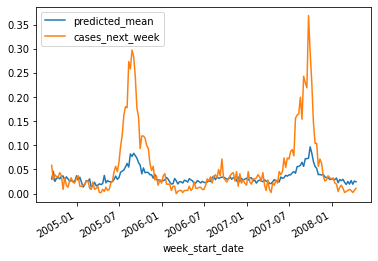

In [207]:
forecast_total_cases_next_week['predicted_mean'].plot(legend=True)
forecast_total_cases_next_week['cases_next_week'].plot(legend=True)